In [234]:
import os, struct
import math, random, copy
import numpy as np
import sys
from scipy import misc
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy
from matplotlib import pyplot as plt
import pandas as pd
import mnist
import scipy.misc

### Step 1 - Flipping images

/Users/poonl/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  
/Users/poonl/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  


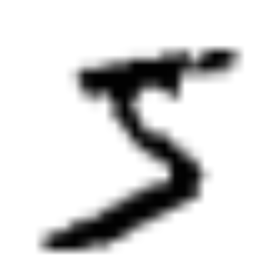

In [235]:
images = mnist.train_images()
scipy.misc.toimage(scipy.misc.imresize(images[0,:,:] * -1 + 256, 10.))


In [236]:
im_of_20 = np.zeros((20, 28, 28))

In [237]:
im_of_20_flip = np.zeros((20, 28, 28))

In [238]:
for i in range(20): #get the first 20 images to work with
    im_of_20[i,:,:] = images[i,:,:]
    
im_of_20_map = np.where(im_of_20 < 0.5 ,-1,1)

### Step 2 - Adding noises to images

In [239]:
noise_df = np.loadtxt("NoiseCoordinates.csv", delimiter= ',',  usecols=range(1,16), skiprows=1)

In [240]:
im_of_20_map[0,21,:]

array([-1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [241]:
noise_df.shape

(40, 15)

In [242]:
im_of_20_flip = im_of_20_map

In [243]:
noise_df[1*2,1]

9.0

In [244]:
for i in range(20):
    for j in range(15):
        row = int(noise_df[i*2,j])
        col = int(noise_df[i*2+1,j])
        if im_of_20_flip[i, row, col] == 1:
            im_of_20_flip[i, row, col] = -1
        else:
            im_of_20_flip[i, row, col] = 1

### Step 3 - Denoising with Mean Field Inference

In [245]:
import copy

In [246]:
initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',') # 28x28
update_df = np.loadtxt("UpdateOrderCoordinates.csv", delimiter= ',', usecols=range(1,785), skiprows=1)

In [247]:
for i in range(10):
    for img in range(20):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num - 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num - 1, col_num])
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num + 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num + 1, col_num])
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num - 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num - 1])
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num + 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num + 1])
            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator
    

In [248]:
initial_df

array([[1.36740135e-05, 5.05675318e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05898015e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05654175e-08, 1.50710407e-04, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05653273e-08, 5.05653273e-08, 5.05653273e-08, 5.05653273e-08,
        5.05897113e-08, 1.50710407e-04, 5.73445842e-08, 3.91657350e-02],
       [5.05675318e-08, 1.86983699e-10, 1.86983669e-10, 1.86983669e-10,
        1.86984002e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86983669e-10,
        1.86984002e-10, 5.57390150e-07, 1.86984669e-10, 5.57390150e-07,
        1.86985327e-10, 1.86983671e-10, 1.86983669e-10, 1.86983669e-10,
        1.86983669e-10, 1.86983669e-10, 1.86983669e-10, 1.86984002e-10,
        1.86983669e-10, 1.87073837e-10, 5.57390264e-07, 5.73169

### Step 4 - Turning in the energy function values computed initially and after each iteration

In [249]:
'''
Helper function to calculate E_q [log P]
'''
def EQLOGP(imgIdx): 
    first_sum = 0 
    sec_sum = 0
    for row in range(28):
        for col in range(28): 
            if col - 1 >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row, col - 1] - 1)
                sec_sum += 2 * (2*initial_df[row, col]-1) * (im_of_20_flip[imgIdx, row , col - 1])
            if col + 1 < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row, col + 1] - 1)
                sec_sum += 2 * (2*initial_df[row, col]-1) * (im_of_20_flip[imgIdx, row , col + 1])
            if row - 1 >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row - 1, col] - 1)
                sec_sum += 2 * (2*initial_df[row, col]-1) * (im_of_20_flip[imgIdx, row - 1, col])
            if row + 1 < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row + 1, col] - 1)
                sec_sum += 2 * (2*initial_df[row, col]-1) * (im_of_20_flip[imgIdx, row + 1, col])
    return first_sum + sec_sum 
    

In [250]:
'''
Helper function to calculate E_q [log Q] 
'''
def EQLOGQ():
    eqlogq = 0
    for row in range(28):
        for col in range(28):
            eqlogq += initial_df[row, col] * (np.log(initial_df[row, col]) + (10e-10)) + \
                (1-initial_df[row, col])*(np.log(1-initial_df[row, col] + (10e-10)))
    return eqlogq

In [251]:
'''
loading the initial VFE
'''
initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',') # 28x28
energy_list = np.zeros((20,11))
first_sum = 0 
sec_sum = 0 
for imgIdx in range(20):
    first_sum = 0 
    sec_sum = 0 
    for row in range(28):
        for col in range(28): 
            if (col - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row, col - 1] - 1)
                sec_sum += 2 * (2 * initial_df[row, col] - 1) * (im_of_20_flip[imgIdx, row , col - 1])
            if (col + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row, col + 1] - 1)
                sec_sum += 2 * (2 * initial_df[row, col] - 1) * (im_of_20_flip[imgIdx, row , col + 1])
            if (row - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row - 1, col] - 1)
                sec_sum += 2 * (2 * initial_df[row, col] - 1) * (im_of_20_flip[imgIdx, row - 1, col])
            if (row + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row, col] - 1) * (2 * initial_df[row + 1, col] - 1)
                sec_sum += 2 * (2 * initial_df[row, col] - 1) * (im_of_20_flip[imgIdx, row + 1, col])
    energy_list[imgIdx,0] = EQLOGQ() - (first_sum + sec_sum) 

In [252]:
for i in range(1,11):
    for img in range(20):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num - 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num - 1, col_num])
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num + 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num + 1, col_num])
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num - 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num - 1])
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num + 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num + 1])
            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator
        energy_list[img, i] = EQLOGQ() - EQLOGP(img)

In [253]:
energy_list

array([[ -439.34752336, -7045.75649442, -7045.65058693, -7045.65058693,
        -7045.65058693, -7045.65058693, -7045.65058693, -7045.65058693,
        -7045.65058693, -7045.65058693, -7045.65058693],
       [ -475.7957465 , -6955.45912087, -6954.55438868, -6954.55438868,
        -6954.55438868, -6954.55438868, -6954.55438868, -6954.55438868,
        -6954.55438868, -6954.55438868, -6954.55438868],
       [ -498.10333194, -7150.02727519, -7151.23912246, -7151.23912246,
        -7151.23912246, -7151.23912246, -7151.23912246, -7151.23912246,
        -7151.23912246, -7151.23912246, -7151.23912246],
       [ -430.0199188 , -7506.62504607, -7506.62172691, -7506.62172691,
        -7506.62172691, -7506.62172691, -7506.62172691, -7506.62172691,
        -7506.62172691, -7506.62172691, -7506.62172691],
       [ -482.95447134, -7219.25990777, -7219.26028207, -7219.26028207,
        -7219.26028207, -7219.26028207, -7219.26028207, -7219.26028207,
        -7219.26028207, -7219.26028207, -7219.260282

### Step 5 - Displaying the reconstructed images (Image 11 - 19)

In [254]:
initial_df = np.loadtxt("InitialParametersModel.csv", delimiter= ',') # 28x28

for i in range(10):
    for img in range(10,20):
        for idx in range(784): 
            row_num = int(update_df[img*2,idx])
            col_num = int(update_df[img*2+1,idx])
            first_sum = 0 
            sec_sum = 0 
            third_sum = 0
            fourth_sum = 0
            if (row_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num - 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num - 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num - 1, col_num])
            if (row_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num + 1, col_num])
                third_sum += -0.8 * (2 * initial_df[row_num + 1, col_num] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num + 1, col_num])
            if (col_num - 1) >= 0:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num - 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num - 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num - 1])
            if (col_num + 1) < 28:
                first_sum += 0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                sec_sum += (2 * im_of_20_flip[img, row_num , col_num + 1])
                third_sum += -0.8 * (2 * initial_df[row_num , col_num + 1] - 1)
                fourth_sum += (-2 * im_of_20_flip[img, row_num , col_num + 1])
            numerator = np.exp(first_sum+sec_sum)
            denominator = numerator + np.exp(third_sum+fourth_sum)

            initial_df[row_num , col_num] = numerator/denominator

In [255]:
a = [] 
for i in range(10,20):
    for row in range(28):
        for col in range(28):
            if (initial_df[row,col] < 0.5):
                if (im_of_20_flip[i, row , col] == 1):
                    im_of_20_flip[i, row , col] = 0
                else: 
                    im_of_20_flip[i, row , col] = 1
    a.append(im_of_20_flip[i])

In [268]:
'''
wrtie to file
'''
output_str = '' 
for row in range(28): # height of image
    for img in range(10): # 10 images align
        for col in range(28):
            output_str += str(a[img][row, col]) + ','
    output_str = output_str[:-1]
    output_str += '\n'

In [272]:
output_str # X in {0,1}

'1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1\n1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,

In [271]:
f= open("output.txt","w+")
f.write(output_str)
f.close()

<function TextIOWrapper.close>

In [190]:
im = copy.deepcopy(im_of_20_map[0,:,:])
out_im = copy.deepcopy(im_of_20_map[0,:,:])
im[:,:] = np.where(im[:,:] < 0.5 ,0,1)

In [191]:
theta_1 = 0.8
theta_2 = 2
im_temp =  copy.deepcopy(initial_df)
im_temp_pr =  copy.deepcopy(initial_df)

In [192]:
for k in range(5):
    for i in range(28):
        for j in range(28):
            EQ_P = 0.0
            EQ_Q = 0
            if (i >= 1): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i-1,j]-1) + theta_2 * im[i-1,j]
            if (i < 27): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i+1,j]-1) + theta_2 * im[i+1,j]
            if (j >= 1): 
                    EQ_P += theta_1 * (2 * im_temp_pr[i,j-1]-1) + theta_2 * im[i,j-1]
            if (j <27):
                    EQ_P += theta_1 * (2 * im_temp_pr[i,j+1]-1) + theta_2 * im[i,j+1]
            im_temp[i,j] = np.exp(EQ_P) / (np.exp(EQ_P)+np.exp(-EQ_P))
    im_temp_pr  =  copy.deepcopy(im_temp)

        
#here is to loop over x y and get the pi[i] as in book page 263

In [186]:
im_temp

array([[ 0.12740902,  0.99063091,  0.99858948,  0.99182831,  0.99976283,
         0.99155932,  0.46782802,  0.99132822,  0.30278311,  0.99132805,
         0.98327455,  0.99132804,  0.99115738,  0.99132592,  0.96408582,
         0.99073241,  0.91147881,  0.82476324,  0.98438455,  0.01156283,
         0.9911696 ,  0.00867552,  0.89432032,  0.00867214,  0.01724408,
         0.0086989 ,  0.01588492,  0.04168815],
       [ 0.9903739 ,  0.12468828,  0.99832164,  0.99996081,  0.99832191,
         0.99004707,  0.99826629,  0.48314053,  0.99826624,  0.9799555 ,
         0.99826624,  0.99825626,  0.99826624,  0.99819381,  0.99826561,
         0.98901391,  0.9976319 ,  0.99531537,  0.39392031,  0.99825525,
         0.00238908,  0.99806205,  0.00175688,  0.56400352,  0.00173688,
         0.02137973,  0.00180422,  0.21750624],
       [ 0.02314021,  0.99826583,  0.95382564,  0.99831386,  0.99828668,
         0.99830467,  0.99235503,  0.99830466,  0.98815466,  0.99830466,
         0.9982915 ,  0.9983

In [85]:
np.sum(im_temp)

625.76477275558659

In [28]:
im_temp_out = np.zeros((28,28))

In [193]:
im_temp_out[:,:] = np.where(im_temp[:,:] < 0.5 ,0,1)

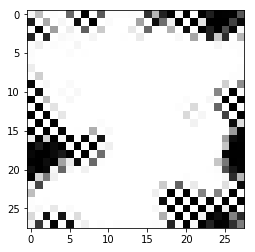

In [194]:
plt.imshow(im_temp.astype(np.float64),cmap='gray')
plt.show() #????????????????????????????????????